<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

dt=pd.read_csv("logistic_regression.csv")
dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,12000.0,36 months,16.00,421.89,E,E2,Exide Technologies,< 1 year,RENT,50004.0,...,13.0,0.0,11660.0,67.0,17.0,f,INDIVIDUAL,NaN,0.0,"0987 Jackson Flats Apt. 524\r\nKeyhaven, SC 70466"
8277,5375.0,36 months,11.99,178.51,B,B3,Sales Leads Management,10+ years,OWN,55000.0,...,11.0,0.0,2447.0,27.2,45.0,f,INDIVIDUAL,0.0,0.0,"54147 Sarah Stravenue\r\nStokesborough, PA 48052"
8278,20000.0,36 months,11.67,661.14,B,B4,Acupunturist/Owner,6 years,MORTGAGE,59000.0,...,14.0,0.0,24696.0,27.0,17.0,w,INDIVIDUAL,1.0,0.0,"9081 Jose Way\r\nDeleonburgh, HI 48052"
8279,21000.0,36 months,10.99,687.42,B,B4,managing director,8 years,RENT,800000.0,...,13.0,2.0,32346.0,73.0,39.0,w,INDIVIDUAL,1.0,0.0,"3149 Campbell Port\r\nMarcusfurt, OK 00813"


## Exploratory Data Analysis

In [2]:
dt.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8281 entries, 0 to 8280
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             8281 non-null   float64
 1   term                  8281 non-null   object 
 2   int_rate              8281 non-null   float64
 3   installment           8281 non-null   float64
 4   grade                 8281 non-null   object 
 5   sub_grade             8281 non-null   object 
 6   emp_title             7795 non-null   object 
 7   emp_length            7893 non-null   object 
 8   home_ownership        8281 non-null   object 
 9   annual_inc            8281 non-null   float64
 10  verification_status   8281 non-null   object 
 11  issue_d               8280 non-null   object 
 12  loan_status           8280 non-null   object 
 13  purpose               8280 non-null   object 
 14  title                 8246 non-null   object 
 15  dti                  

In [4]:
dt.shape

(8281, 27)

In [5]:
dt.describe(include="all")

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,8281.000000,8281,8281.000000,8281.000000,8281,8281,7795,7893,8281,8.281000e+03,...,8280.000000,8280.000000,8280.000000,8276.000000,8280.000000,8280,8280,7532.000000,8273.000000,8280
unique,NaN,2,NaN,NaN,7,35,5833,11,3,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,8278
top,NaN,36 months,NaN,NaN,B,B4,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USNS Shepherd\r\nFPO AE 48052
freq,NaN,6338,NaN,NaN,2490,568,94,2645,4064,NaN,...,NaN,NaN,NaN,NaN,NaN,5000,8263,NaN,NaN,2
mean,14084.844826,NaN,13.645040,431.239646,NaN,NaN,NaN,NaN,NaN,7.371283e+04,...,11.236957,0.178502,15779.856401,53.662527,25.211232,NaN,NaN,1.761152,0.122205,NaN
std,8295.900105,NaN,4.457835,247.637881,NaN,NaN,NaN,NaN,NaN,5.453750e+04,...,5.031116,0.507008,18883.334427,24.480247,11.741908,NaN,NaN,2.106868,0.354484,NaN
min,900.000000,NaN,5.320000,21.620000,NaN,NaN,NaN,NaN,NaN,2.500000e+03,...,1.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.640000,254.030000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,5907.500000,35.700000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,377.230000,NaN,NaN,NaN,NaN,NaN,6.320800e+04,...,10.000000,0.000000,11001.000000,54.900000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,19750.000000,NaN,16.490000,563.560000,NaN,NaN,NaN,NaN,NaN,8.900000e+04,...,14.000000,0.000000,19545.250000,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [6]:
#loanstatus Proportion
 (dt["loan_status"].value_counts(normalize=True)*100).reset_index()

,loan_status,proportion
0,Fully Paid,80.809179
1,Charged Off,19.190821


In [7]:
#application_type Proportion
(dt["application_type"].value_counts(normalize=True)*100).reset_index()

,application_type,proportion
0,INDIVIDUAL,99.794686
1,JOINT,0.108696
2,DIRECT_PAY,0.096618


In [8]:
#Term proportion
 (dt["term"].value_counts(normalize=True)*100).reset_index()

,term,proportion
0,36 months,76.53665
1,60 months,23.46335


In [9]:
# employee title and its proportion of share
 (dt["emp_title"].value_counts(normalize=True)*100).reset_index().sort_values(by="proportion",ascending=False).head(10)

,emp_title,proportion
0,Teacher,1.205901
1,Manager,1.077614
2,RN,0.590122
3,Supervisor,0.487492
4,Registered Nurse,0.436177
5,Driver,0.397691
6,Office Manager,0.384862
7,manager,0.372033
8,Sales,0.333547
9,Owner,0.307890


In [10]:
# based on grade
(dt["grade"].value_counts(normalize=True)*100).reset_index()

,grade,proportion
0,B,30.068832
1,C,26.421930
2,D,16.060862
3,A,15.855573
4,E,7.752687
5,F,3.139717
6,G,0.700399


In [11]:
# based on homeownership
(dt["home_ownership"].value_counts(normalize=True)*100).reset_index()

,home_ownership,proportion
0,MORTGAGE,49.076199
1,RENT,41.709938
2,OWN,9.213863


In [12]:
dt["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy', nan], dtype=object)

In [13]:
# based on purpose
(dt["purpose"].value_counts(normalize=True)*100).reset_index()

,purpose,proportion
0,debt_consolidation,58.949275
1,credit_card,21.400966
2,home_improvement,6.195652
3,other,5.205314
4,major_purchase,2.125604
5,small_business,1.328502
6,car,1.243961
7,medical,0.929952
8,vacation,0.724638
9,house,0.724638


In [14]:
round((dt.groupby(["purpose"])[["term"]].value_counts(normalize=True)*100),2).reset_index().transpose()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
purpose,car,car,credit_card,credit_card,debt_consolidation,debt_consolidation,educational,home_improvement,home_improvement,house,...,moving,other,other,renewable_energy,small_business,small_business,vacation,vacation,wedding,wedding
term,36 months,60 months,36 months,60 months,36 months,60 months,36 months,36 months,60 months,36 months,...,60 months,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months
proportion,80.58,19.42,79.63,20.37,74.33,25.67,100.0,78.75,21.25,85.0,...,9.43,80.74,19.26,100.0,70.0,30.0,91.67,8.33,80.56,19.44


In [15]:
dt.groupby(["home_ownership"])[["loan_status"]].value_counts(normalize=True).reset_index()

,home_ownership,loan_status,proportion
0,MORTGAGE,Fully Paid,0.842028
1,MORTGAGE,Charged Off,0.157972
2,OWN,Fully Paid,0.782438
3,OWN,Charged Off,0.217562
4,RENT,Fully Paid,0.773820
5,RENT,Charged Off,0.226180


In [72]:
dt.groupby(["grade"])[["loan_status"]].value_counts(normalize=True).reset_index()

,grade,loan_status,proportion
0,A,1.0,0.948697
1,A,0.0,0.051303
2,B,1.0,0.874043
3,B,0.0,0.125957
4,C,1.0,0.797555
5,C,0.0,0.202445
6,D,1.0,0.689436
7,D,0.0,0.310564
8,E,1.0,0.643813
9,E,0.0,0.356187


In [16]:
dt.groupby(["grade"])[["annual_inc"]].mean().reset_index()

,grade,annual_inc
0,A,83157.844760
1,B,73090.677434
2,C,70744.221513
3,D,68097.657677
4,E,71840.592757
5,F,89453.624692
6,G,77518.431034


In [17]:
dt.groupby(["grade","sub_grade"])[["annual_inc"]].mean().reset_index().transpose()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
grade,A,A,A,A,A,B,B,B,B,B,...,F,F,F,F,F,G,G,G,G,G
sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
annual_inc,96227.75299,80728.917228,81960.371869,79858.297415,81156.395575,75834.015817,75927.290485,72391.683575,70538.090493,71632.967271,...,84347.140741,79166.327869,71225.755102,80637.384186,178431.096154,80386.826087,73513.416667,96164.0,63337.142857,60001.833333


## Data Preprocessing

In [18]:
# Extraction of Year from ECL year
dt['ecl_year'] = dt['earliest_cr_line'].str.split('-').str[-1]
dt['ecl_year'] = pd.to_numeric(dt['ecl_year'])

In [19]:
# Extraction of pincode from address
dt['pin_code'] = dt['address'].str.split(' ').str[-1]


In [20]:
dt['issue_d_y'] = dt['issue_d'].str.split('-').str[-1]
dt['issue_d_y'] = pd.to_numeric(dt['issue_d_y'])

In [21]:
# Dropping the columns
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
dt= dt.drop(columns=columns_to_drop)

In [22]:
# Dropping the columns 'emp_title' and 'title'
columns_to_drop = ['emp_title', 'title']
dt = dt.drop(columns=columns_to_drop)

In [23]:
# Null values Treatment
(dt.isnull().sum()/dt.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.685424
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.012076
purpose                 0.012076
dti                     0.012076
open_acc                0.012076
pub_rec                 0.012076
revol_bal               0.012076
revol_util              0.060379
total_acc               0.012076
initial_list_status     0.012076
application_type        0.012076
mort_acc                9.044801
pub_rec_bankruptcies    0.096607
ecl_year                0.012076
pin_code                0.012076
issue_d_y               0.012076
dtype: float64

In [24]:
dt['emp_length'] = dt['emp_length'].fillna(dt['emp_length'].mode()[0])
dt['revol_util'] = dt['revol_util'].fillna(dt['revol_util'].mean())
dt['mort_acc'] = dt['mort_acc'].fillna(dt['mort_acc'].mean())
dt['pub_rec_bankruptcies'] = dt['pub_rec_bankruptcies'].fillna(dt['pub_rec_bankruptcies'].mean())

In [25]:
(dt.isna().sum()/dt.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.012076
purpose                 0.012076
dti                     0.012076
open_acc                0.012076
pub_rec                 0.012076
revol_bal               0.012076
revol_util              0.000000
total_acc               0.012076
initial_list_status     0.012076
application_type        0.012076
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
ecl_year                0.012076
pin_code                0.012076
issue_d_y               0.012076
dtype: float64

In [26]:
dt['loan_status'] = dt['loan_status'].replace('Fully Paid', 1)
dt['loan_status'] = dt['loan_status'].replace('Charged Off', 0)


In [27]:
# Extraction and Conversion of data from categorical columns
dt['months'] = dt['term'].str.split(' ').str[-2]
dt['months'] = pd.to_numeric(dt['months'])

dt['emp_length'] = dt['emp_length'].str.split(" ").str[-2]
dt['emp_length_years'] = dt['emp_length'].replace('10+', '10')
dt['emp_length_years'] = pd.to_numeric(dt['emp_length_years'])

dt = dt.drop(columns= ['term', 'emp_length'])

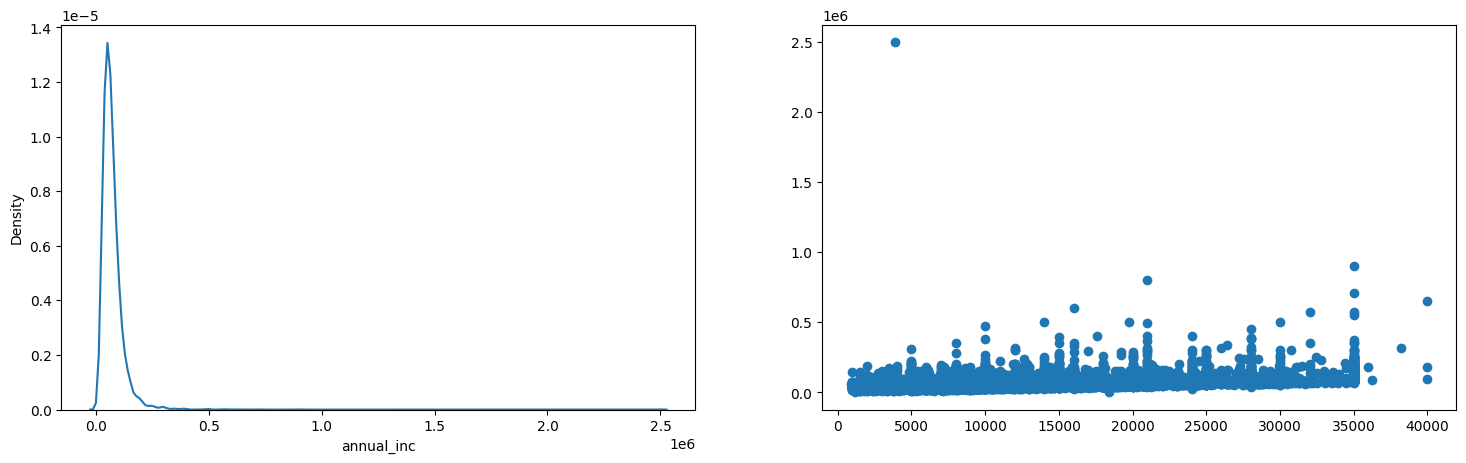

In [28]:
#outlier treatment based on Annual income
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='annual_inc')

plt.subplot(1, 2, 2)
plt.scatter(x = dt['loan_amnt'], y = dt['annual_inc'])

In [29]:
mean_=dt["annual_inc"].mean()
std=dt["annual_inc"].std()

upper_limit=mean_+3*std
lower_limit=mean_-3*std



dt=dt[(dt["annual_inc"]<upper_limit) & (dt["annual_inc"]>lower_limit)]

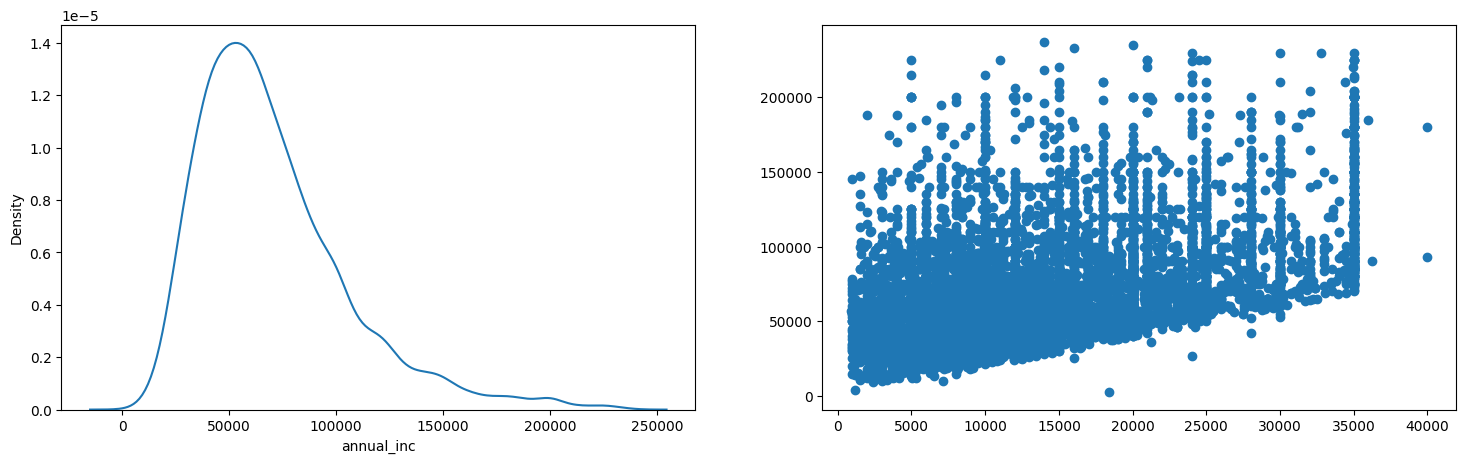

In [30]:
#after Outlier treatment
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='annual_inc')

plt.subplot(1, 2, 2)
plt.scatter(x = dt['loan_amnt'], y = dt['annual_inc'])

<Axes: xlabel='loan_amnt', ylabel='dti'>

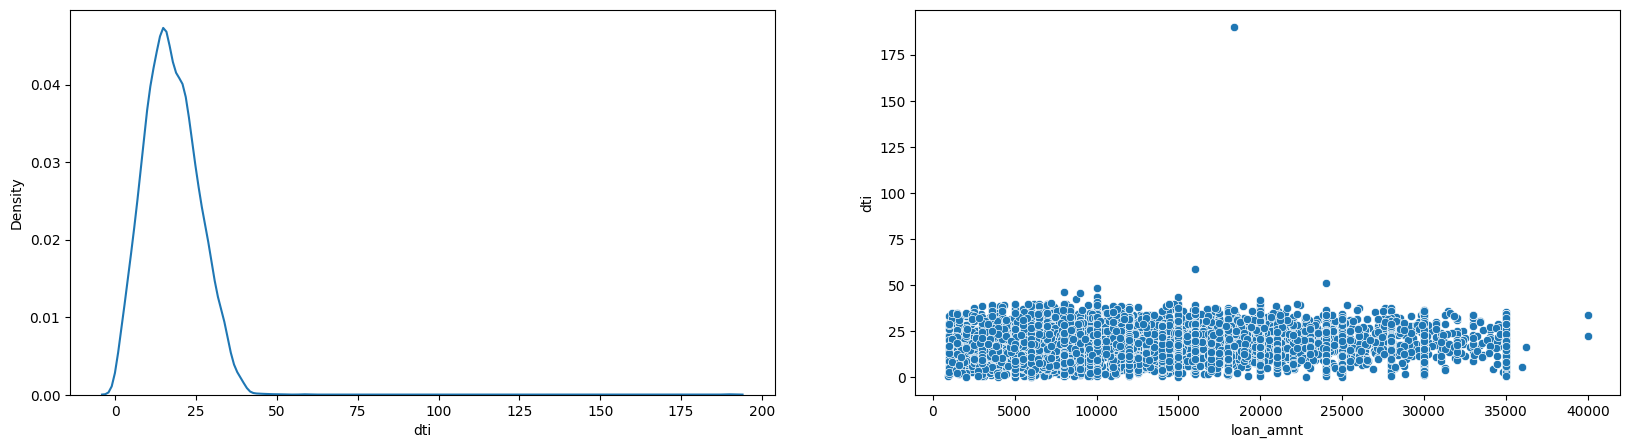

In [31]:
#outlier treatment based on dti
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='dti')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['dti'])


In [32]:
mean_1=dt["dti"].mean()
std1=dt["dti"].std()

upper_limit1=mean_1+3*std1
lower_limit1=mean_1-3*std1



dt=dt[(dt["dti"]<upper_limit1) & (dt["dti"]>lower_limit1)]

<Axes: xlabel='loan_amnt', ylabel='dti'>

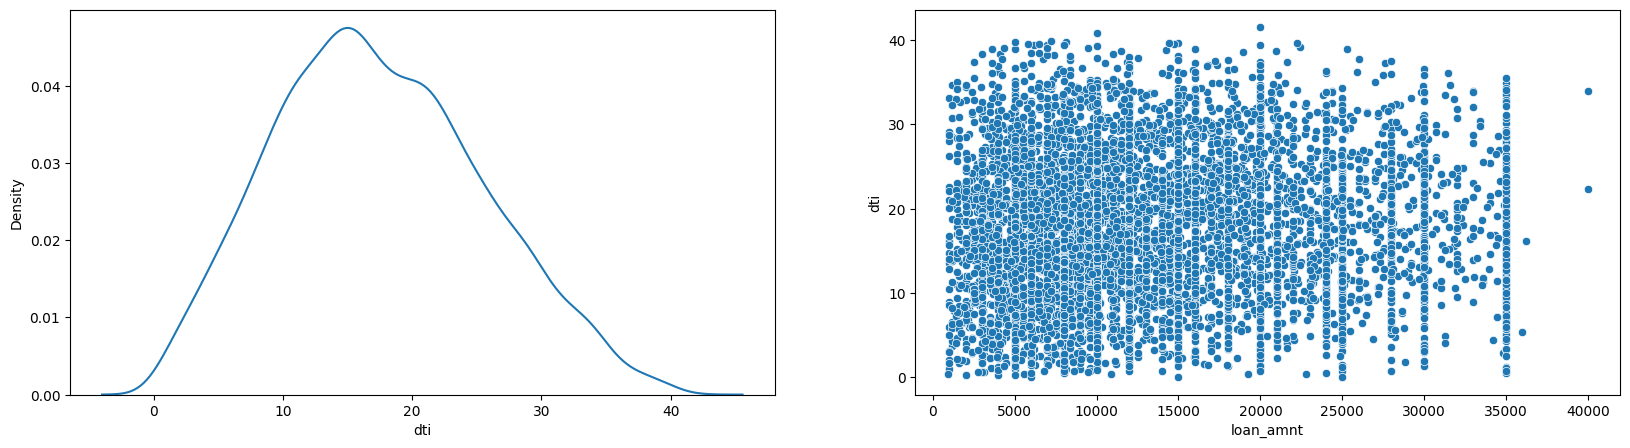

In [33]:
#after Outlier treatment dti
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='dti')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['dti'])

<Axes: xlabel='loan_amnt', ylabel='revol_bal'>

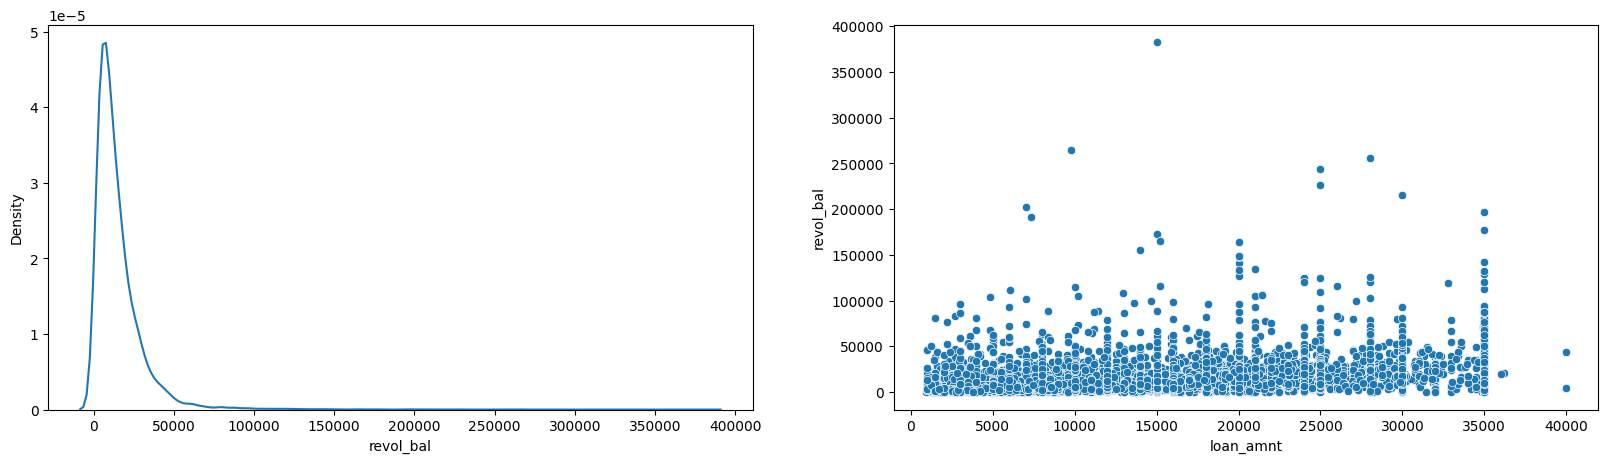

In [34]:
#outlier treatment based on revol_bal
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='revol_bal')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['revol_bal'])

In [35]:
mean_2=dt["revol_bal"].mean()
std2=dt["revol_bal"].std()

upper_limit2=mean_2+3*std2
lower_limit2=mean_2-3*std2



dt=dt[(dt["revol_bal"]<upper_limit2) & (dt["revol_bal"]>lower_limit2)]

<Axes: xlabel='loan_amnt', ylabel='revol_bal'>

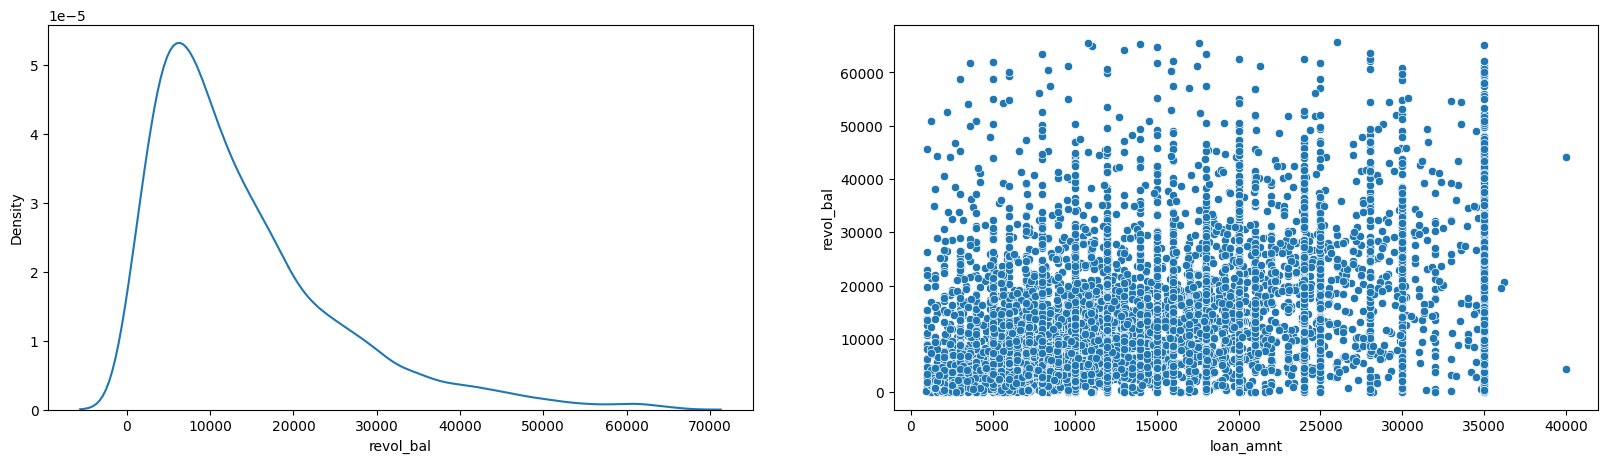

In [36]:
#outlier treatment after based on revol_bal
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x="revol_bal")

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt["revol_bal"])

<Axes: xlabel='loan_amnt', ylabel='pub_rec'>

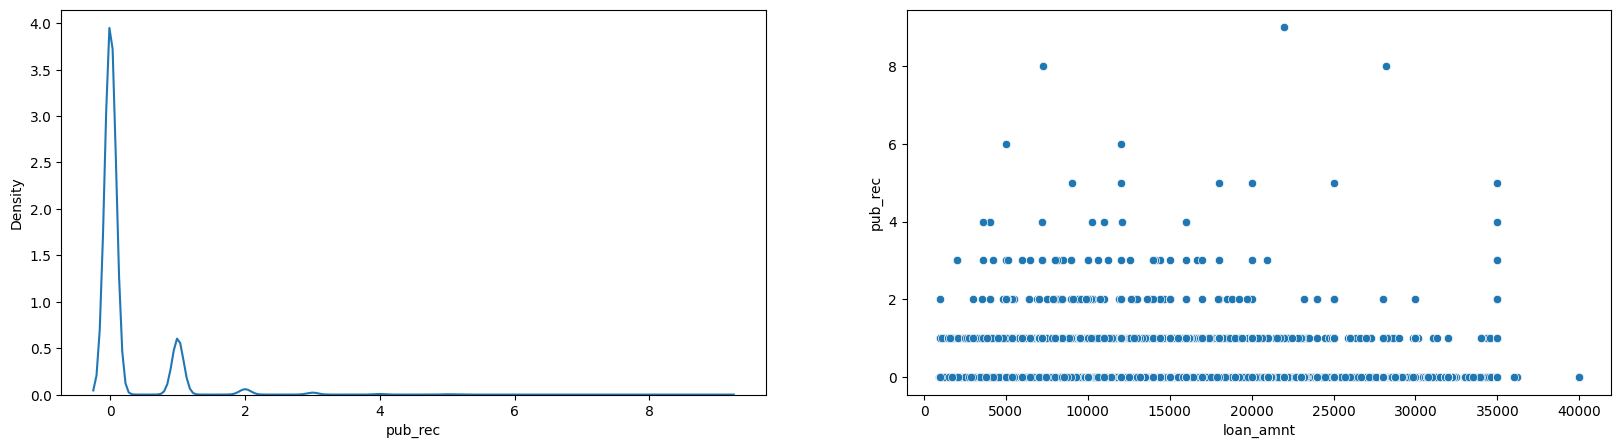

In [37]:
#outlier treatment based on pub_rec
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='pub_rec')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['pub_rec'])

In [38]:
mean_3=dt["pub_rec"].mean()
std3=dt["pub_rec"].std()

upper_limit3=mean_3+3*std3
lower_limit3=mean_3-3*std3



dt=dt[(dt["pub_rec"]<upper_limit3) & (dt["pub_rec"]>lower_limit3)]

<Axes: xlabel='loan_amnt', ylabel='pub_rec'>

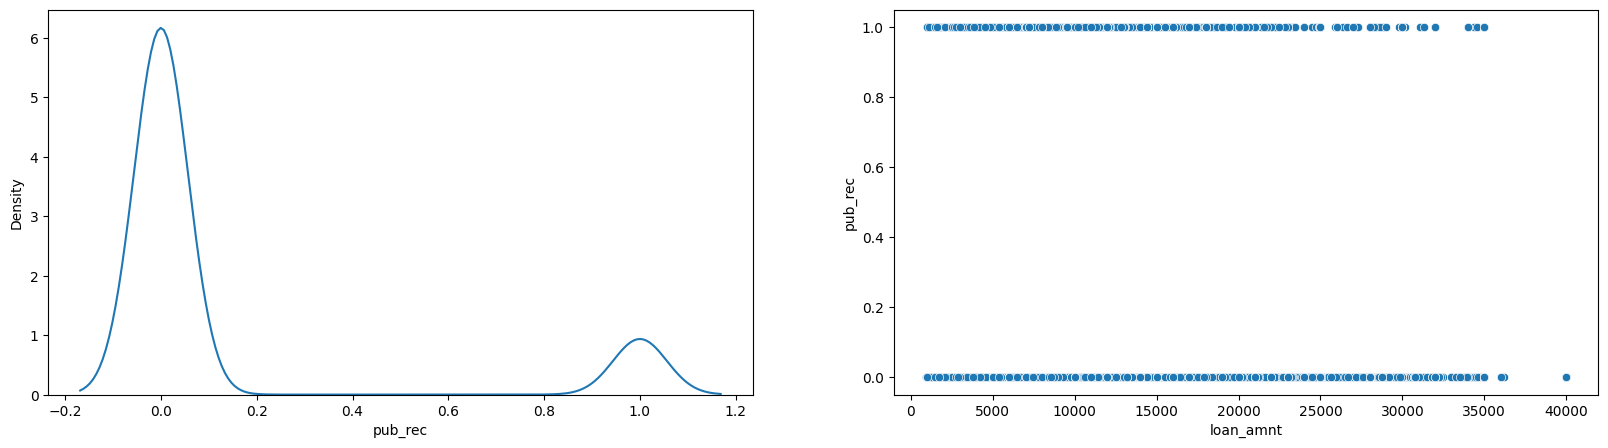

In [39]:
#after outlier treatmentbased on pub_rec
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='pub_rec')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['pub_rec'])

<Axes: xlabel='loan_amnt', ylabel='mort_acc'>

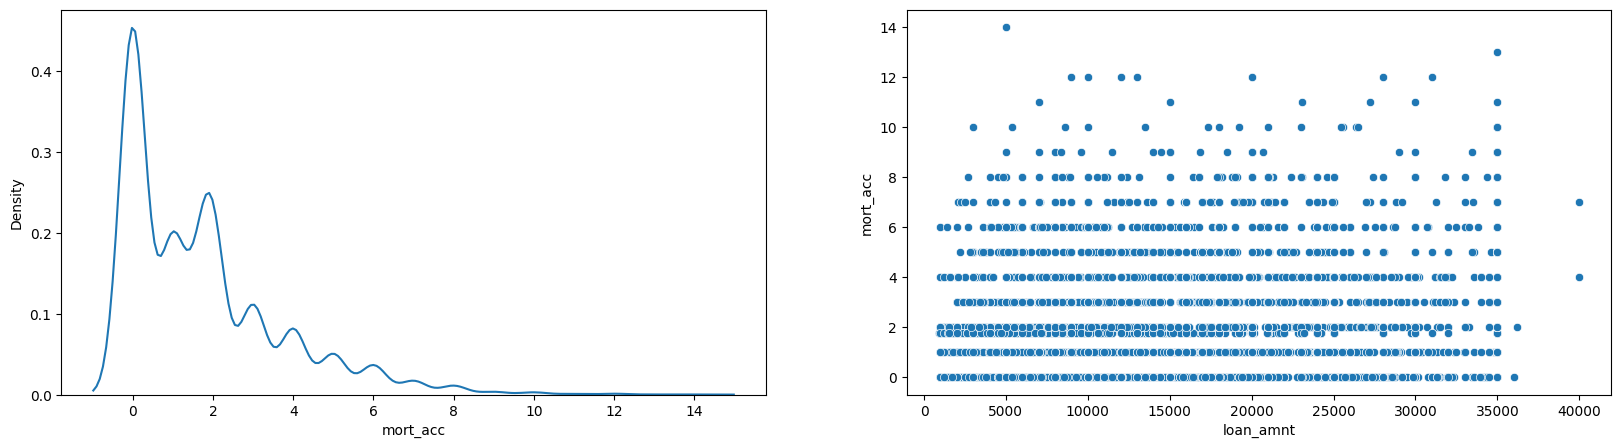

In [40]:
#outlier treatment based on mort_acc
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='mort_acc')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['mort_acc'])

In [41]:
mean_4=dt["mort_acc"].mean()
std4=dt["mort_acc"].std()

upper_limit4=mean_4+3*std4
lower_limit4=mean_4-3*std4



dt=dt[(dt["mort_acc"]<upper_limit4) & (dt["mort_acc"]>lower_limit4)]

<Axes: xlabel='loan_amnt', ylabel='mort_acc'>

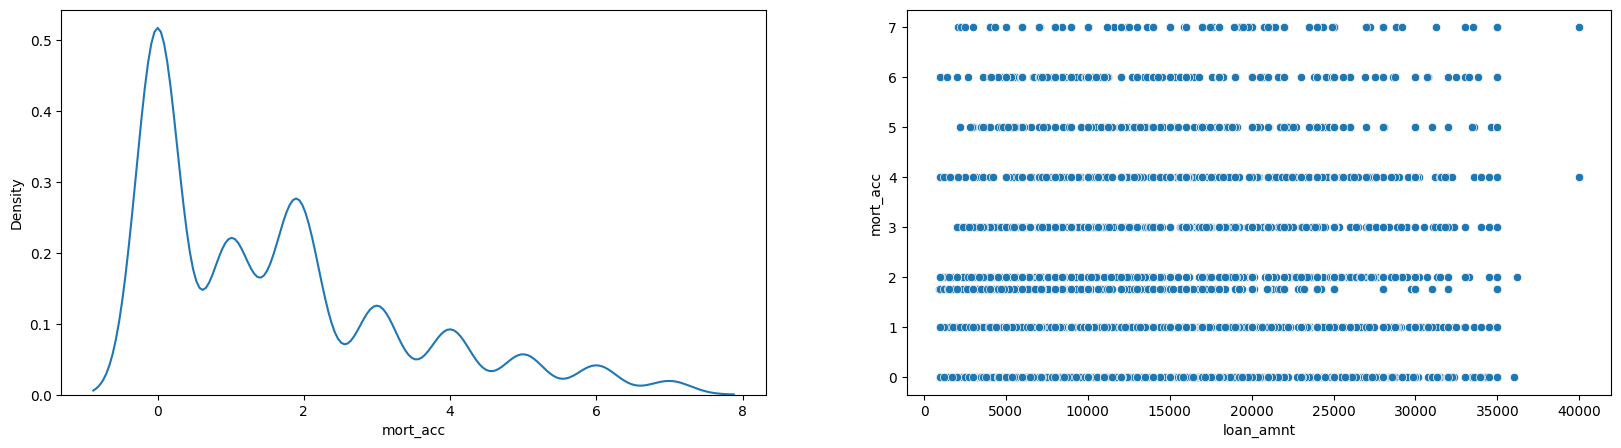

In [42]:
#after outlier treatmentbased on Bankruptcy Records
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=dt, x='mort_acc')

plt.subplot(1, 2, 2)
sns.scatterplot(x = dt['loan_amnt'], y = dt['mort_acc'])

## Data Processing and Model Building

In [43]:
for i in ('grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code'):
  dt[i] = dt[i].astype(str)
  dt['ecl_year'] = dt['ecl_year'].astype(int)

In [44]:
dt.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'ecl_year', 'pin_code', 'issue_d_y', 'months',
       'emp_length_years'],
      dtype='object')

In [45]:
#Feature Engineering - label Encoding for categorical Variables
from sklearn.preprocessing import LabelEncoder

X=dt.drop(columns=["loan_status"],axis=1)
y=dt["loan_status"]

LE= LabelEncoder()

for i in ('grade', 'sub_grade','home_ownership', 'purpose','verification_status', 'initial_list_status', 'application_type', 'pin_code'):
  X[i] = LE.fit_transform(X[i])




In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7767 entries, 0 to 8278
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             7767 non-null   float64
 1   int_rate              7767 non-null   float64
 2   installment           7767 non-null   float64
 3   grade                 7767 non-null   int64  
 4   sub_grade             7767 non-null   int64  
 5   home_ownership        7767 non-null   int64  
 6   annual_inc            7767 non-null   float64
 7   verification_status   7767 non-null   int64  
 8   purpose               7767 non-null   int64  
 9   dti                   7767 non-null   float64
 10  open_acc              7767 non-null   float64
 11  pub_rec               7767 non-null   float64
 12  revol_bal             7767 non-null   float64
 13  revol_util            7767 non-null   float64
 14  total_acc             7767 non-null   float64
 15  initial_list_status   7767

In [47]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7767 entries, 0 to 8278
Series name: loan_status
Non-Null Count  Dtype  
--------------  -----  
7767 non-null   float64
dtypes: float64(1)
memory usage: 121.4 KB


In [48]:
# train,validation,test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 43)

In [49]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

loan_status
1.0    4387
0.0    1049
Name: count, dtype: int64
loan_status
1.0    952
0.0    213
Name: count, dtype: int64
loan_status
1.0    925
0.0    241
Name: count, dtype: int64


In [50]:
# sicne there is imbalance in training dataset, we use smote to create synthetic data for minority class to balance
from imblearn.over_sampling import SMOTE

smt=SMOTE(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)

print(y_train_smt.value_counts())


loan_status
0.0    4387
1.0    4387
Name: count, dtype: int64


In [51]:
# calculation of vif to check the multicollinearity and remove features which are not in acceptable range
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data=pd.DataFrame()
VIF_data["Variable"]=X_train_smt.columns
VIF_data["VIF"]=[variance_inflation_factor(X_train_smt.values,i) for i in range(X_train_smt.shape[1])]
print(VIF_data)

                Variable            VIF
0              loan_amnt     255.149988
1               int_rate     286.084352
2            installment     224.322751
3                  grade      45.542994
4              sub_grade     170.911085
5         home_ownership       2.709236
6             annual_inc       9.059370
7    verification_status       2.936743
8                purpose       2.614682
9                    dti       9.726313
10              open_acc      15.096151
11               pub_rec       5.214420
12             revol_bal       5.200367
13            revol_util      10.816981
14             total_acc      14.325608
15   initial_list_status       1.555005
16      application_type     595.236003
17              mort_acc       3.017262
18  pub_rec_bankruptcies       4.958266
19              ecl_year  118958.601206
20              pin_code       4.864656
21             issue_d_y  120819.298158
22                months     135.848511
23      emp_length_years       4.892888


In [52]:
VI=VIF_data.query("VIF>10")
list(VI["Variable"])

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'open_acc',
 'revol_util',
 'total_acc',
 'application_type',
 'ecl_year',
 'issue_d_y',
 'months']

In [53]:
X_train_new = X_train_smt.drop(columns=['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'open_acc', 'revol_util',
 'total_acc', 'application_type', 'ecl_year', 'issue_d_y', 'months'])

In [54]:
V1=pd.DataFrame()
V1["Variable"]=X_train_new.columns
V1["VIF"]= [variance_inflation_factor(X_train_new,i) for i in range(X_train_new.shape[1])]
print(V1)

                Variable       VIF
0         home_ownership  2.205036
1             annual_inc  5.725069
2    verification_status  2.589015
3                purpose  2.224681
4                    dti  6.097989
5                pub_rec  5.108952
6              revol_bal  3.793184
7    initial_list_status  1.445570
8               mort_acc  2.645998
9   pub_rec_bankruptcies  4.886767
10              pin_code  4.044182
11      emp_length_years  4.207765


In [55]:
X_val_new = X_val.drop(columns=['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'open_acc', 'revol_util',
 'total_acc', 'application_type', 'ecl_year', 'issue_d_y', 'months'])
X_test_new = X_test.drop(columns=['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'open_acc', 'revol_util',
 'total_acc', 'application_type', 'ecl_year', 'issue_d_y', 'months'])

In [56]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new=scaler.fit_transform(X_train_new)
X_val_new=scaler.fit_transform(X_val_new)
X_test_new=scaler.transform(X_test_new)

In [57]:
#model creation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

lr=LogisticRegression()
lr.fit(X_train_new,y_train_smt)

y_pred=lr.predict(X_val_new)

In [73]:
lr.coef_

array([[ 0.19425982,  0.14870715,  0.07933716,  0.04136084, -0.27291997,
        -0.1514429 , -0.03987101,  0.38361179,  0.18137598,  0.11966553,
        -0.80278841,  0.08028074]])

0.5690987124463519
              precision    recall  f1-score   support

         0.0       0.26      0.71      0.38       213
         1.0       0.89      0.54      0.67       952

    accuracy                           0.57      1165
   macro avg       0.57      0.62      0.52      1165
weighted avg       0.78      0.57      0.62      1165



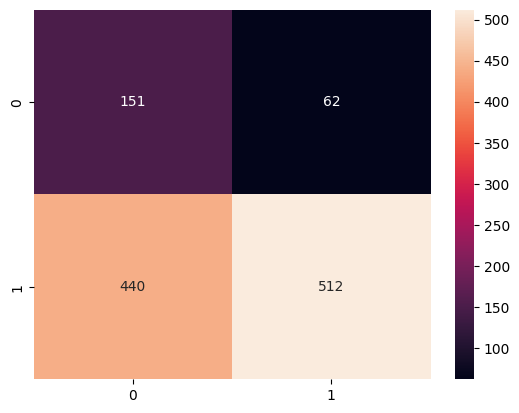

In [58]:
#metrics
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(accuracy)
print(classification_rep)

sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [60]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(X_val_new)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

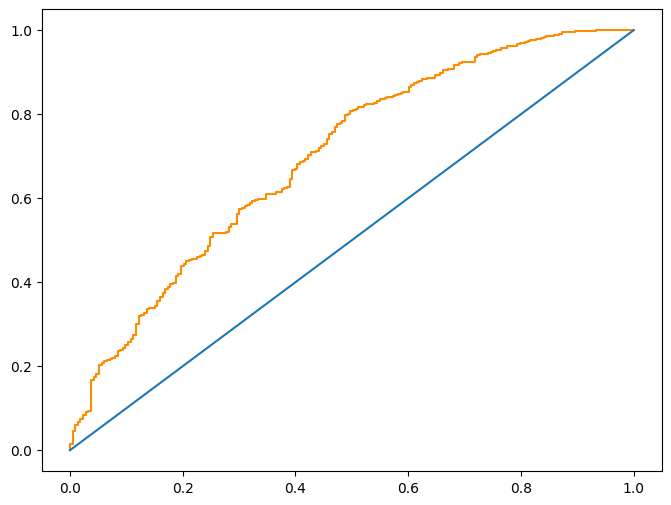

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1])

0.5617495711835334
              precision    recall  f1-score   support

         0.0       0.28      0.74      0.41       241
         1.0       0.88      0.52      0.65       925

    accuracy                           0.56      1166
   macro avg       0.58      0.63      0.53      1166
weighted avg       0.76      0.56      0.60      1166



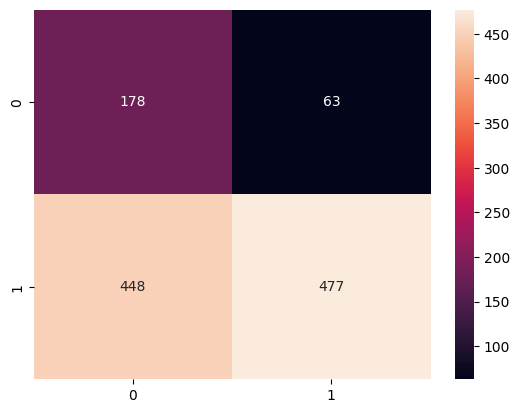

In [65]:
y_prd=lr.predict(X_test_new)
accuracy = accuracy_score(y_test, y_prd)
conf_matrix = confusion_matrix(y_test, y_prd)
classification_rep = classification_report(y_test, y_prd)

print(accuracy)
print(classification_rep)

sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [66]:
y_prob = lr.predict_proba(X_test_new)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

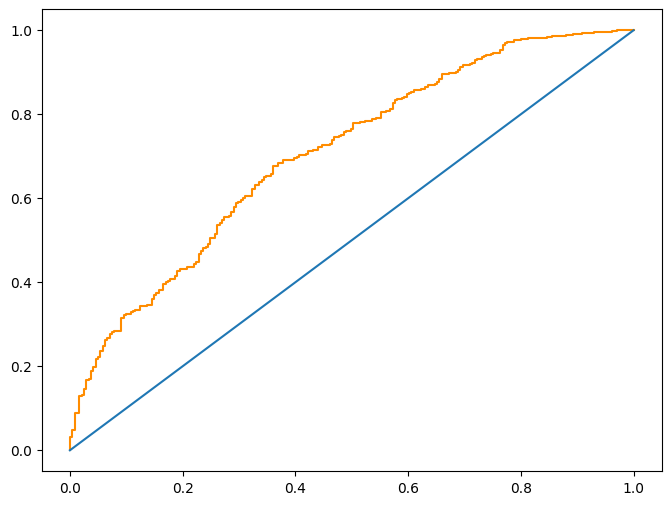

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1])

In [68]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(penalty='l2', solver='liblinear')
param_grid = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_new, y_train_smt)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred1 = best_model.predict(X_val_new)
accuracy = accuracy_score(y_val, y_pred1)

print(best_params)
print(accuracy)

{'C': 0.001, 'penalty': 'l2'}
0.5708154506437768


The model's precision value of 0.88 signifies that it accurately predicts the likelihood of loan repayment in 88% of cases

## Questionnaire

1. What percentage of customers have fully paid their Loan Amount?

    Ans: 81% of customers have fully paid the loan amount

2. Comment about the correlation between Loan Amount and Installment features.
    Ans:

3. The majority of people have home ownership as----
    Ans: Mortage

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
    Ans: True around 95 % have fully paid their loan

5. Name the top 2 afforded job titles
    Ans: Teacher & Manager

6. Thinking from a bank's perspective, which metric should our primary focus be
on..1ROC AUC,2. Precision,3. Recall,4. F1 Score
    Ans: Precision

7. How does the gap in precision and recall affect the bank?

    Ans : We will lose potential customers by not giving loan and the chance of providing a loan to non potential customers

8. Which were the features that heavily affected the outcome?
    Ans: pincode or address

9. Will the results be affected by geographical location? (Yes/No)
    Ans: yes. Based on the location potential such as Government policies,Potential growth of locaion,Population,lifestyle etc has effect on loan types